## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
#!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0)
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

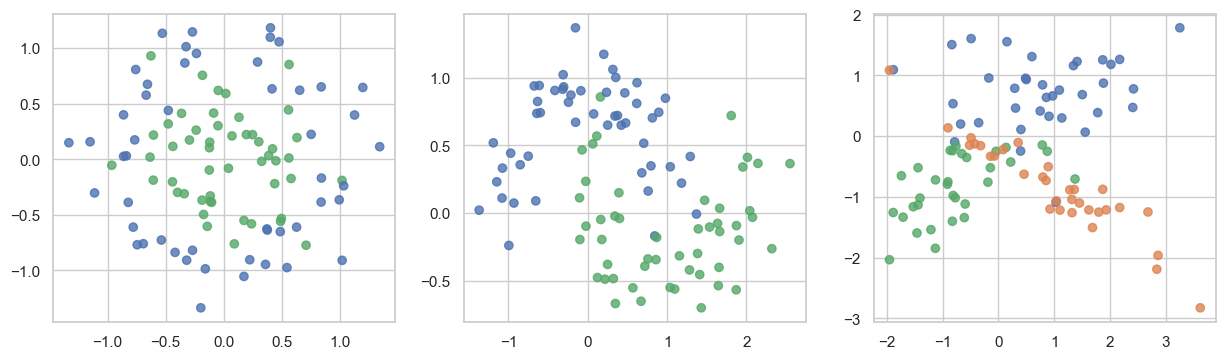

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

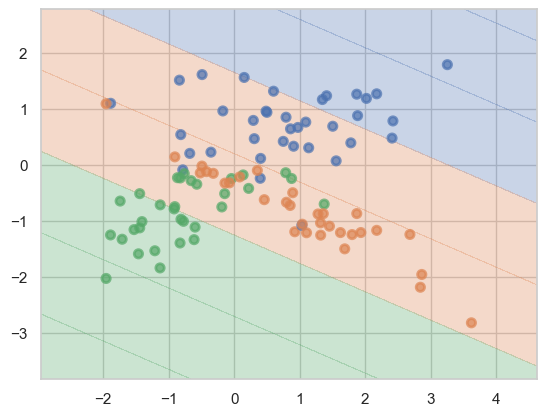

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset #0
Training Set Accuracy: 1.0
Test Set Accuracy: 0.75
Dataset #1
Training Set Accuracy: 1.0
Test Set Accuracy: 0.95
Dataset #2
Training Set Accuracy: 1.0
Test Set Accuracy: 0.7


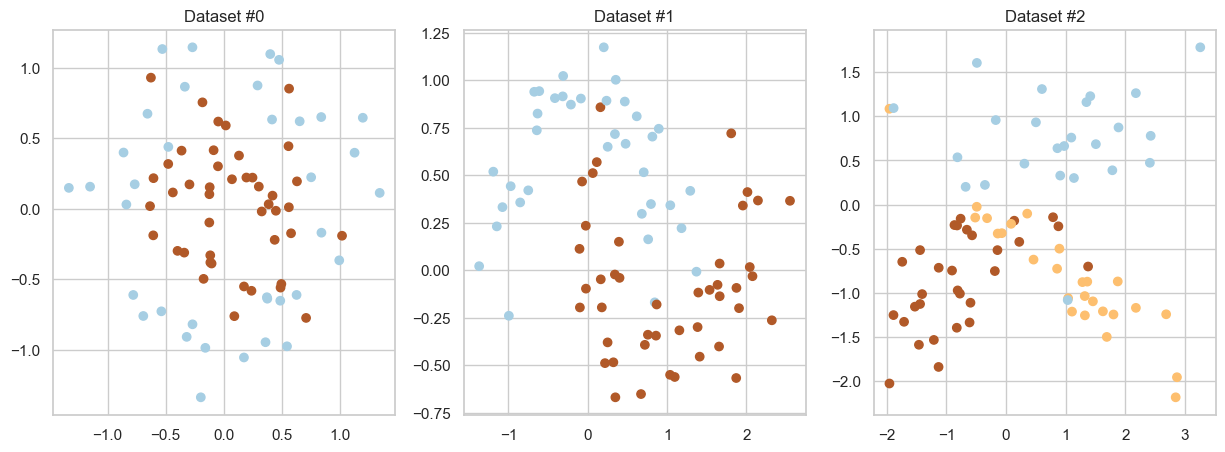

In [8]:
fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
    tree = DecisionTreeClassifier().fit(x_train, y_train)

    axes[i].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    axes[i].set_title('Dataset #%i' % i)

    print('Dataset #%i' % i)
    print('Training Set Accuracy:', tree.score(x_train, y_train))
    print('Test Set Accuracy:', tree.score(x_test, y_test))

plt.show()

## ВЫВОД: 
Наш классификатор на основе дерева решений последовательно достигал безупречной точности на обучающей выборке в 100% на разных наборах данных. Однако, на первый взгляд, это впечатляющее достижение, закрепленное нижними показателями точности на тестовых данных, указывает на переобучение. Сложные границы решений на наших визуализациях подчеркивают неспособность модели обобщать новые данные. Это подчеркивает важность борьбы с переобучением с помощью техник, таких как регуляризация, для улучшения обобщения модели.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

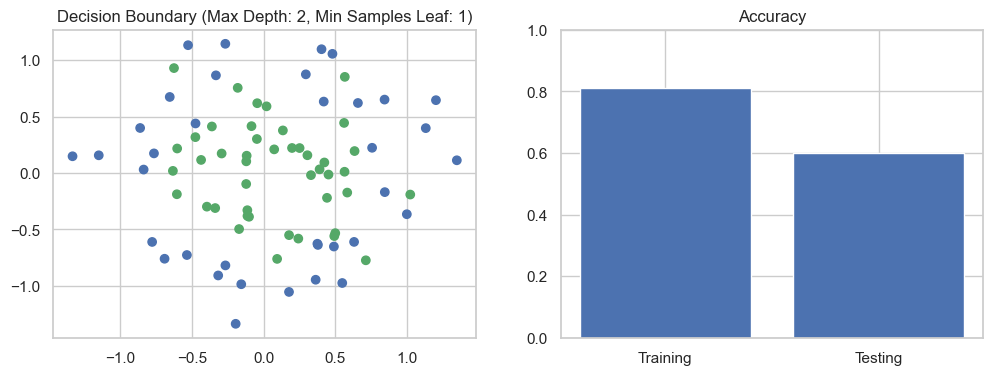

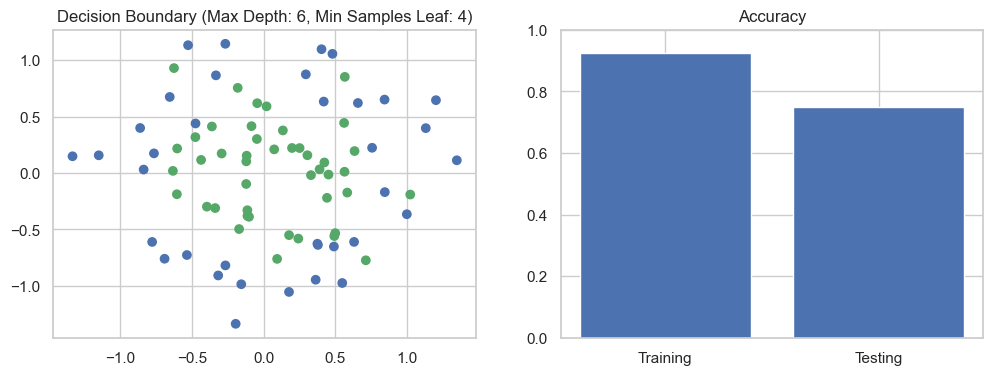

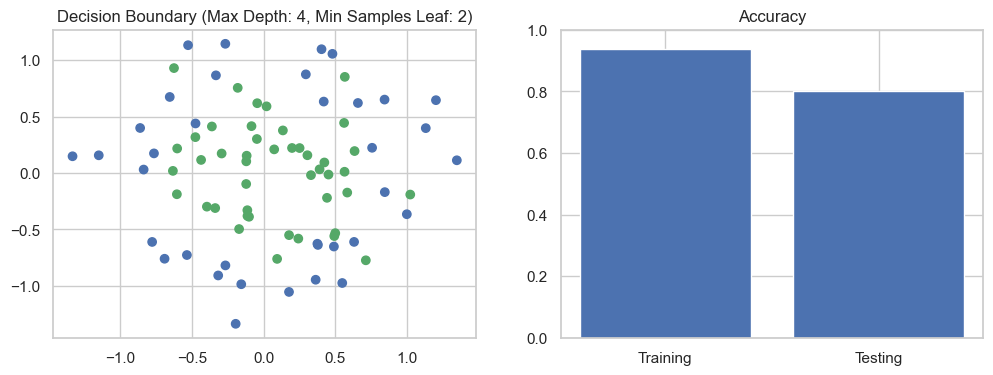

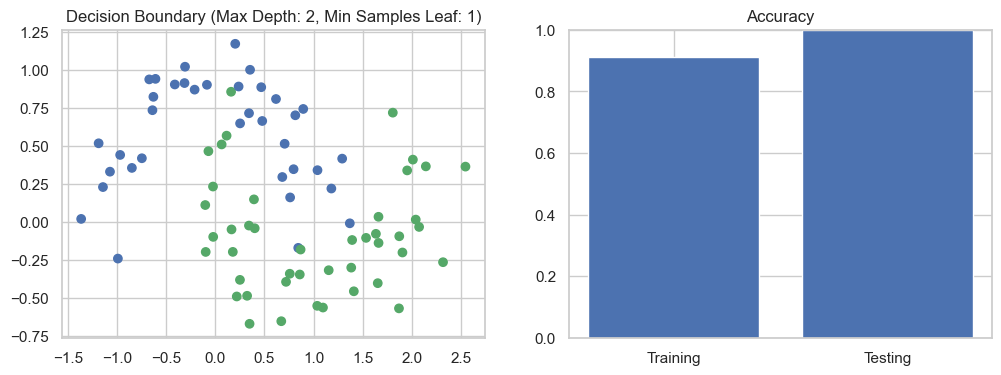

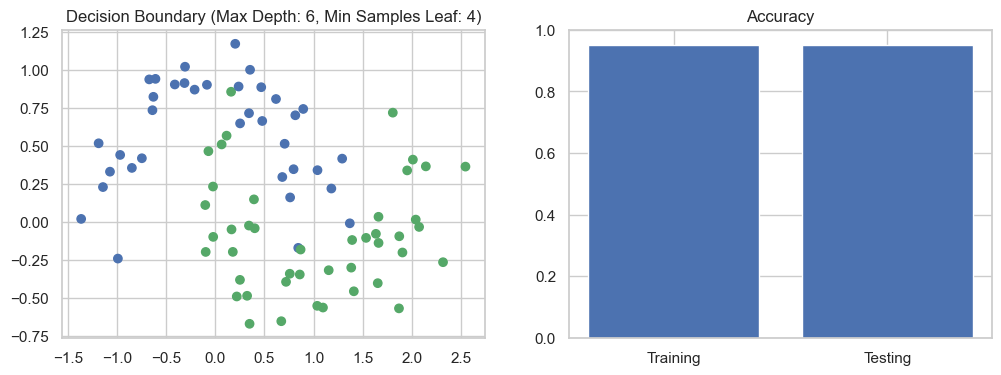

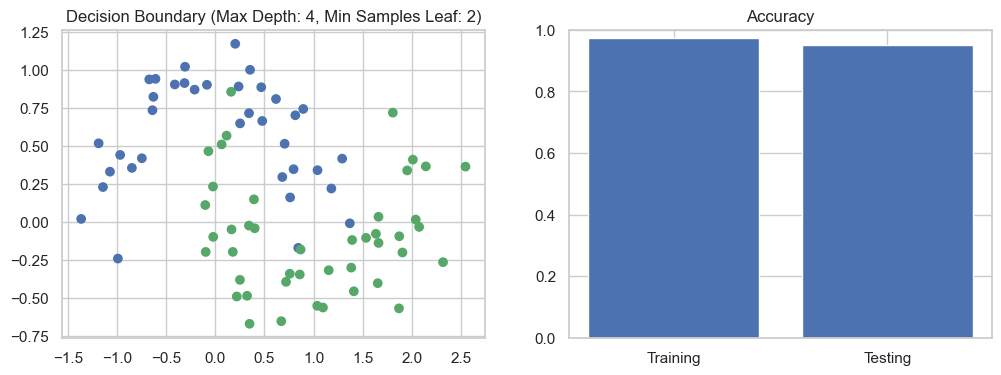

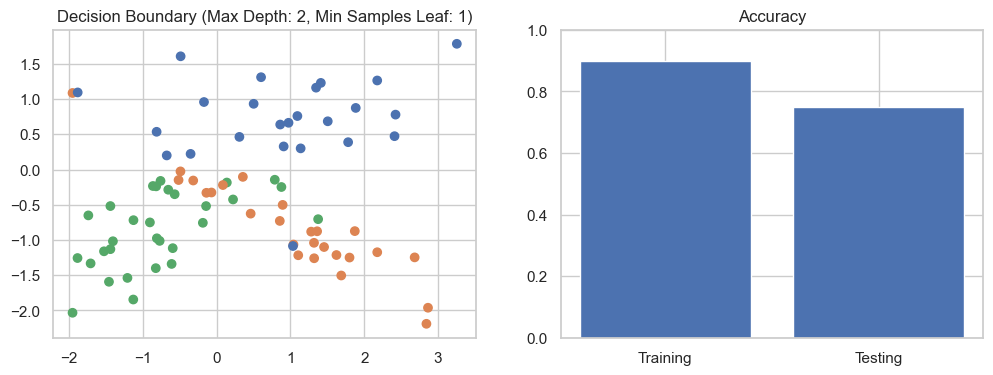

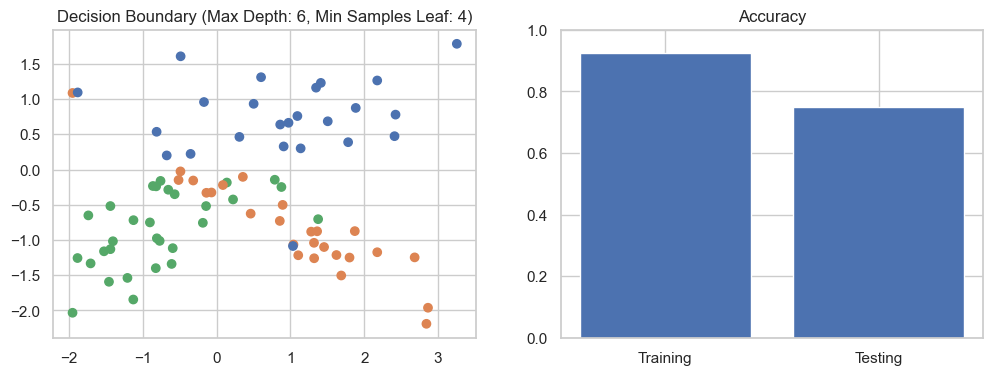

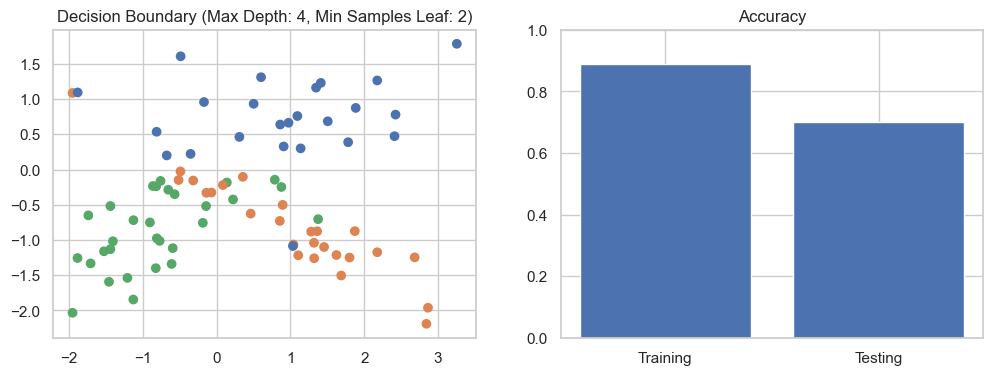

In [9]:
# Define a range of hyperparameter values to explore
max_depth_values = [2, 4, 6, 8]
min_samples_leaf_values = [1, 2, 4, 8]

for i, dataset in enumerate(datasets):
    X, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # Example 1
    max_depth = 2
    min_samples_leaf = 1
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(x_train, y_train)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap)
    plt.title(f'Decision Boundary (Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf})')
    
    train_accuracy = tree.score(x_train, y_train)
    test_accuracy = tree.score(x_test, y_test)
    
    plt.subplot(1, 2, 2)
    plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy])
    plt.title('Accuracy')
    plt.ylim(0, 1)

    # Example 2
    max_depth = 6
    min_samples_leaf = 4
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(x_train, y_train)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap)
    plt.title(f'Decision Boundary (Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf})')
    
    train_accuracy = tree.score(x_train, y_train)
    test_accuracy = tree.score(x_test, y_test)
    
    plt.subplot(1, 2, 2)
    plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy])
    plt.title('Accuracy')
    plt.ylim(0, 1)

    # Example 3
    max_depth = 4
    min_samples_leaf = 2
    tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(x_train, y_train)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap)
    plt.title(f'Decision Boundary (Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf})')
    
    train_accuracy = tree.score(x_train, y_train)
    test_accuracy = tree.score(x_test, y_test)
    
    plt.subplot(1, 2, 2)
    plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy])
    plt.title('Accuracy')
    plt.ylim(0, 1)

plt.show()


## ВЫвод: 
Графики демонстрируют влияние изменения гиперпараметров, таких как `max_depth` и `min_samples_leaf`, на модели деревьев решений, примененные к разным наборам данных. Изменение этих параметров приводит к различным границам решений и точности модели. В целом, увеличение `max_depth` часто приводит к более сложным границам решений, что может повлечь за собой переобучение, в то время как увеличение `min_samples_leaf` приводит к более простым границам решений и может улучшить обобщение. Поведение этих параметров различается в зависимости от наборов данных, что отражает влияние характеристик данных на производительность модели.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [10]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    # Sort the feature vector and corresponding target vector
    sorted_indices = np.argsort(feature_vector)
    sorted_feature = feature_vector[sorted_indices]
    sorted_target = target_vector[sorted_indices]

    # Find unique thresholds
    unique_thresholds = np.unique(sorted_feature)
    threshold_candidates = 0.5 * (unique_thresholds[1:] + unique_thresholds[:-1])

    # Initialize variables
    num_samples = len(sorted_target)
    left_size = np.arange(1, num_samples)
    left_cumulative_sum = np.cumsum(sorted_target)
    left_prob_1 = left_cumulative_sum[:-1] / left_size
    left_prob_0 = 1 - left_prob_1

    right_prob_1 = left_cumulative_sum[-1] - left_cumulative_sum[:-1]
    right_prob_1 /= (num_samples - left_size)
    right_prob_0 = 1 - right_prob_1

    # Calculate Gini impurity for each threshold
    gini_impurity = (left_size / num_samples) * (left_prob_0**2 + left_prob_1**2 - 1) + \
                    ((num_samples - left_size) / num_samples) * (right_prob_0**2 + right_prob_1**2 - 1)
    gini_impurity = gini_impurity[unique_thresholds[:-1] != unique_thresholds[1:]]

    # Find the index of the best threshold and its corresponding Gini impurity
    best_threshold_index = np.argmax(gini_impurity)
    best_threshold = threshold_candidates[best_threshold_index]
    best_gini_impurity = gini_impurity[best_threshold_index]

    return threshold_candidates, gini_impurity, best_threshold, best_gini_impurity


#### 4. (0.5 балла)

Загрузите таблицу students.csv (это немного преобразованный датасет User Knowledge). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("students.csv")
data

,Unnamed: 0,STG,SCG,STR,LPR,PEG,UNS
0,0,0.00,0.00,0.00,0.00,0.00,0
1,1,0.08,0.08,0.10,0.24,0.90,1
2,2,0.06,0.06,0.05,0.25,0.33,0
3,3,0.10,0.10,0.15,0.65,0.30,1
4,4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...,...
253,253,0.61,0.78,0.69,0.92,0.58,1
254,254,0.78,0.61,0.71,0.19,0.60,1
255,255,0.54,0.82,0.71,0.29,0.77,1
256,256,0.50,0.75,0.81,0.61,0.26,1


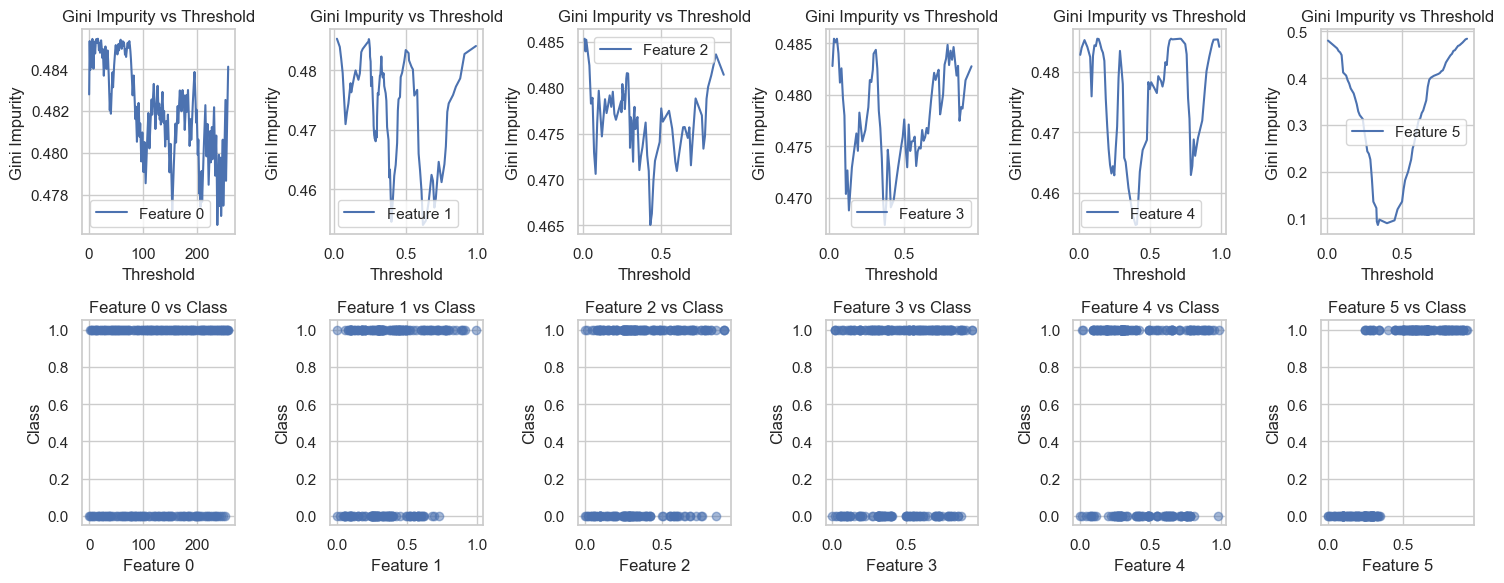

In [13]:
# Split the data into features and the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Function to calculate Gini impurity
def gini_impurity(y):
    p1 = np.sum(y) / len(y)
    p0 = 1 - p1
    return 1 - (p0 ** 2 + p1 ** 2)

# Create subplots for the charts
fig, axs = plt.subplots(2, X.shape[1], figsize=(15, 6))

# Plot "threshold - Gini impurity" curves for all features
for i in range(X.shape[1]):
    feature_values = X.iloc[:, i]
    thresholds = np.sort(np.unique(feature_values))
    gini_values = []

    for threshold in thresholds:
        mask = feature_values < threshold
        left_y = y[mask]
        right_y = y[~mask]
        gini = (len(left_y) / len(y)) * gini_impurity(left_y) + (len(right_y) / len(y)) * gini_impurity(right_y)
        gini_values.append(gini)

    axs[0, i].plot(thresholds, gini_values, label=f"Feature {i}")
    axs[0, i].set_xlabel("Threshold")
    axs[0, i].set_ylabel("Gini Impurity")
    axs[0, i].set_title(f"Gini Impurity vs Threshold")
    axs[0, i].legend()

# Visualize scatter plots "feature value - class" for all features
for i in range(X.shape[1]):
    axs[1, i].scatter(X.iloc[:, i], y, alpha=0.5)
    axs[1, i].set_xlabel(f"Feature {i}")
    axs[1, i].set_ylabel("Class")
    axs[1, i].set_title(f"Feature {i} vs Class")

plt.tight_layout()
plt.show()


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

## Вывод:
Исходя из кривых Джини, признак, по которому следует разделить набор данных на два поддерева, - это тот признак, для которого значение критерия Джини становится максимальным после разделения. Таким образом, мы выбираем признак с наивысшим значением критерия Джини после разделения.

Согласованность этого результата с визуальной оценкой диаграмм рассеяния зависит от данных. В идеальном случае "хороший" признак для разделения будет иметь кривую критерия Джини, близкую к нулю (или минимальной) до разделения и достигающую максимума после разделения. Это означает, что классы идеально разделены при определенном пороге, что проявляется в резком пике на кривой критерия Джини.

Признаки, по которым разделение практически невозможно, будут иметь кривые критерия Джини, которые плоские и близки к случайному разделению, что приводит к высокому значению критерия Джини после разделения. Это указывает на то, что такой признак неэффективен для разделения классов.

В итоге выбор оптимального признака для разделения играет важную роль в построении хорошего дерева решений, и он определяется как с помощью кривых Джини, так и визуальной оценкой диаграмм рассеяния.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [42]:
#!pip install --upgrade ipykernel

In [44]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

def find_best_split(feature_vector, target_vector):
    def gini_impurity(y):
        p1 = np.sum(y) / len(y)
        p0 = 1 - p1
        return 1 - p1**2 - p0**2

    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]

    thresholds = (sorted_features[:-1] + sorted_features[1:]) / 2
    ginis = np.zeros(len(thresholds))

    for i, threshold in enumerate(thresholds):
        left_indices = sorted_targets[:i + 1]
        right_indices = sorted_targets[i + 1:]
        left_gini = gini_impurity(left_indices)
        right_gini = gini_impurity(right_indices)
        gini = (len(left_indices) / len(target_vector)) * left_gini + (len(right_indices) / len(target_vector)) * right_gini
        ginis[i] = gini

    best_idx = np.argmin(ginis)
    threshold_best = thresholds[best_idx]
    gini_best = ginis[best_idx]

    return thresholds, ginis, threshold_best, gini_best

class DecisionTree(BaseEstimator):
    feature_types = None  # Class-level attribute
    max_depth = None  # Class-level attribute
    min_samples_leaf = None  # Add min_samples_leaf as a class-level attribute
    min_samples_split = None

    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        if np.any([ft != "real" and ft != "categorical" for ft in feature_types]):
            raise ValueError("There is an unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf 

    def _fit_node(self, sub_X, sub_y, node, depth):
        if len(sub_y) == 0:
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    current_click = clicks.get(key, 0)  # Handle division by zero
                    if current_click == 0:
                        ratio[key] = 0  # Set ratio to 0 when current_click is 0
                    else:
                        ratio[key] = current_count / current_click
                sorted_categories = sorted(ratio.items(), key=lambda x: x[1])
                categories_map = {key: i for i, (key, _) in enumerate(sorted_categories)}
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [x[0] for x in sorted_categories if x[1] < threshold]
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        else:
            feature_split = node["feature_split"]
            if self._feature_types[feature_split] == "real":
                threshold = node["threshold"]
            elif self._feature_types[feature_split] == "categorical":
                threshold = node["categories_split"]  # Handle categorical threshold correctly
            else:
                raise ValueError
            if x[feature_split] < threshold:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree, depth=0)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [45]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms.head(5)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

for col_name in mushrooms.columns:
    le = LabelEncoder()
    mushrooms.loc[:, col_name] = le.fit_transform(mushrooms.loc[:, col_name])

In [47]:
target = mushrooms['p']
features = mushrooms.drop(columns='p')
x_train, x_test, y_train, y_test = train_test_split(features.values, target.values,
                                                    test_size=0.5, random_state=127)

In [48]:
feature_types = ['categorical' for x in x_train]
my_tree = DecisionTree(feature_types)
my_tree.fit(x_train, y_train)
y_pred = my_tree.predict(x_test)
print('test accuracy =', np.sum(y_pred == y_test) / np.size(y_test))
y_pred = my_tree.predict(x_train)
print('train accuracy =', np.sum(y_pred == y_train) / np.size(y_train))
print('depth =', my_tree.depth)

KeyboardInterrupt: 

__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [49]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tic_tac_toe = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

In [50]:
tic_tac_toe.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [51]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [52]:
mask = (cars.loc[:, 'unacc'] == 'unacc').values
cars.loc[:, 'unacc'][mask] = 'acc'
mask = (cars.loc[:, 'unacc'] == 'vgood').values
cars.loc[:, 'unacc'][mask] = 'good'

In [53]:
nursery.head()

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [54]:
mask = (nursery.loc[:, 'recommend'] == 'not_recom').values
nursery.loc[:, 'recommend'][mask] = 'recommend'
mask = (nursery.loc[:, 'recommend'] == 'very_recom').values
nursery.loc[:, 'recommend'][mask] = 'priority'
mask = (nursery.loc[:, 'recommend'] == 'spec_prior').values
nursery.loc[:, 'recommend'][mask] = 'priority'

In [55]:
def algs(feat, targ):
    result_dict = {}
    result_dict['real'] = [cross_val_score(DecisionTree(['real' for x in feat.columns]), 
                                          feat.values, targ, cv=10, scoring="accuracy").mean()]
    result_dict['cat'] = [cross_val_score(DecisionTree(['categorical' for x in feat.columns]), 
                                         feat.values, targ, cv=10, scoring="accuracy").mean()]
    feat_one_hot = OneHotEncoder(sparse=False).fit_transform(feat)
    result_dict['real + oh'] = [cross_val_score(DecisionTree(['real'] * feat_one_hot.shape[1]), 
                                       feat_one_hot, targ, cv=10, scoring="accuracy").mean()]
    result_dict['sklearn'] = [cross_val_score(DecisionTreeClassifier(), feat.values, targ, cv=10,
                                            scoring="accuracy").mean()]
    return result_dict

In [56]:
data_list = [mushrooms, tic_tac_toe, cars, nursery]
for dataset in data_list:
    for col_name in dataset.columns:
        le = LabelEncoder()
        dataset.loc[:, col_name] = le.fit_transform(dataset.loc[:, col_name])

In [57]:
feat_list = []
feat_list.append(mushrooms.drop(columns='p'))
feat_list.append(tic_tac_toe.drop(columns='positive'))
feat_list.append(cars.drop(columns='unacc'))
feat_list.append(nursery.drop(columns='recommend'))

In [58]:
targ_list = []
targ_list.append(mushrooms['p'].values)
targ_list.append(tic_tac_toe['positive'].values)
targ_list.append(cars['unacc'].values)
targ_list.append(nursery['recommend'].values)

In [59]:
rows_list = ['mushrooms', 'tictactoe', 'cars', 'nursery']
columns_list = ['real', 'cat', 'real + oh', 'sklearn']

In [60]:
df = pd.DataFrame(columns=columns_list)
for i in range(4):
    curr_dict = algs(feat_list[i], targ_list[i])
    curr_dict['name'] = rows_list[i]
    df = df.append(curr_dict, ignore_index=True)
df.set_index('name')

TypeError: 'NoneType' object is not iterable

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

На всех датасетах, кроме игры "крестики-нолики", достигается высокая точность. Я считаю, что более низкая точность в датасете "крестики-нолики" связана с дисбалансом классов. В датасете "детский сад" точность одинакова для разных методов, совпадая до третьего знака после запятой, что делает невозможным сравнение методов и оценку их эффективности на основе полученных результатов.

Для двух других датасетов наилучшие результаты достигаются, когда при построении дерева решений признаки рассматриваются как категориальные. Это соответствует ожиданиям, так как эти признаки по своей природе категориальные (они не имеют упорядоченного значения), и рассмотрение их как вещественные вводит ошибочную информацию и снижает точность.